In [2]:
import numpy as np

In [3]:
import Common

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from collections import Counter

In [7]:
t=np.arange(0,20,2)
t

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [8]:
t=np.array([1,1,1,2,2,2,2,2,2,3,4,5,6])

** dictionary has got method get ==> fetches values for the Key, subscript is the index    
Let's say dict.get('x',1) ==> returns 2nd value of the key 'x' from the dictionary dict **

In [9]:
a=Common.Hist(t)
a.hist

{1: 3, 2: 6, 3: 1, 4: 1, 5: 1, 6: 1}

In [10]:
a.freq(1)

3

** Alternatively **

In [11]:
#1
np.bincount(t)

array([0, 3, 6, 1, 1, 1, 1], dtype=int64)

In [12]:
#2
counter =Counter(t)
print(counter)


Counter({2: 6, 1: 3, 3: 1, 4: 1, 5: 1, 6: 1})


In [13]:
#3
df=pd.DataFrame(t,columns=(['test']))
df.test.value_counts()

2    6
1    3
6    1
5    1
4    1
3    1
Name: test, dtype: int64

In [14]:
## We read dictionary into dct, then dct calls read fixed
dct=Common.ReadStataDct("2002FemPreg.dct")

df=dct.ReadFixedWidth("2002FemPreg.dat.gz",compression='gzip')

df=Common.CleanFemPreg(df)

In [15]:
live = df[df.outcome ==1]

In [16]:
birthwgt_lb_val=live.birthwgt_lb.dropna()

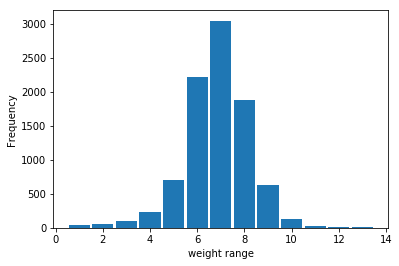

In [17]:
_=plt.hist(birthwgt_lb_val,bins=np.arange(1,15,1),histtype='bar',align='left',rwidth=0.9)
_=plt.xlabel('weight range')
_=plt.ylabel('Frequency')

In [18]:
birthwgt_oz_val=df.birthwgt_oz.dropna()
birtwght_oz_min=birthwgt_oz_val.min()
birtwght_oz_max=birthwgt_oz_val.max()

In [19]:
birtwght_oz_max,birtwght_oz_min

(15.0, 0.0)

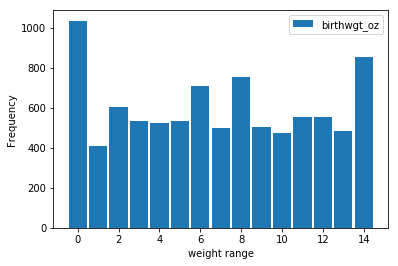

In [20]:
_=plt.hist(birthwgt_oz_val,bins=np.arange(0,16,1),histtype='bar',align='left',rwidth=0.9,label='birthwgt_oz')
_=plt.xlabel('weight range')
_=plt.ylabel('Frequency')
_=plt.legend(loc='best')

In [21]:
#Common.MakePregMap(df)
live=df[df.outcome==1]

In [22]:
live_birthwgt_lb=live.birthwgt_lb.dropna()

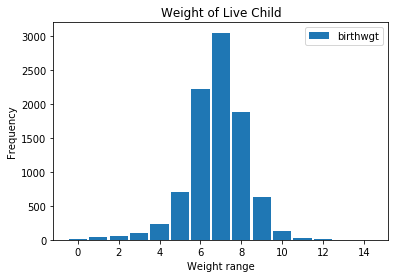

In [23]:
_=plt.hist(live_birthwgt_lb,bins=np.arange(0,16,1),rwidth=0.9,align='left',label='birthwgt')
_=plt.xlabel('Weight range')
_=plt.ylabel('Frequency')
_=plt.title('Weight of Live Child')
_=plt.legend(loc='best')



In [24]:
agepreg_val=df.agepreg.dropna()

In [25]:
agepreg_min=agepreg_val.min();agepreg_max=agepreg_val.max()

In [26]:
agepreg_min,agepreg_max

(10.33, 44.08)

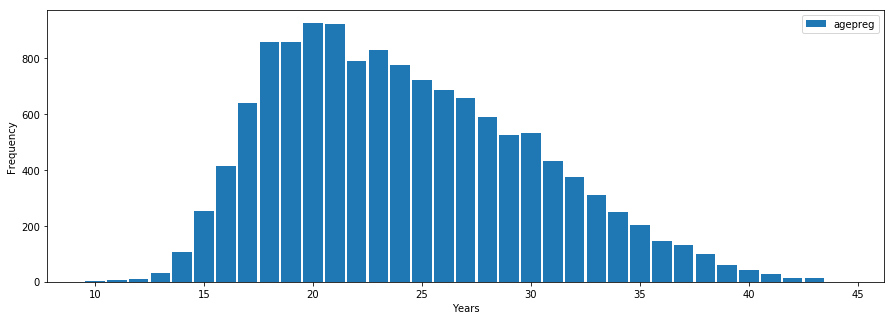

In [27]:
_=plt.figure(figsize=(15,5))
_=plt.hist(agepreg_val,bins=np.arange(np.ceil(agepreg_min)-1,np.ceil(agepreg_max)+1,1),align='left',label='agepreg',rwidth=0.9)
_=plt.xlabel('Years')
_=plt.ylabel('Frequency')
_=plt.legend(loc='best')

In [28]:
prglngth_val=df.prglngth
prglngth_val_min=prglngth_val.min()
prglngth_val_max=prglngth_val.max()

In [29]:
def MakeHistPlot(val_arr,steps=1,align1='left',align2='left',label1='',label2='',width1=0.9):
    plt.figure(figsize=(15,5))
    plt.hist(val_arr,bins=np.arange(np.ceil(val_arr.min())-1,np.ceil(val_arr.max())+1,steps),align=align1,
           label=label1,rwidth=width1)

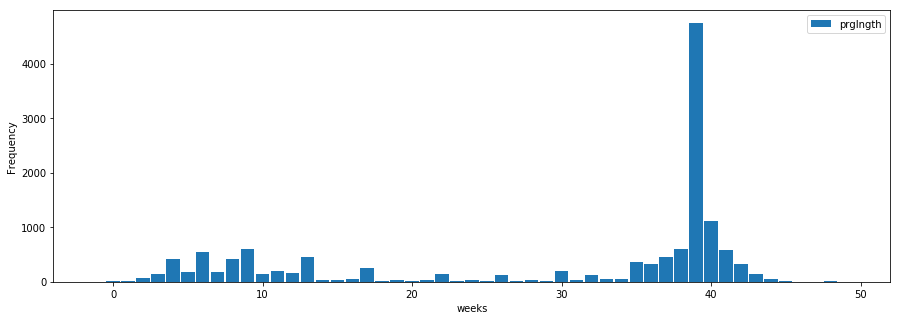

In [30]:
_=plt.figure(figsize=(15,5))
_=plt.hist(prglngth_val,bins=np.arange(np.ceil(prglngth_val_min)-1,np.ceil(prglngth_val_max)+1,1),align='left',
           label='prglngth',rwidth=0.9)
_=plt.xlabel('weeks')
_=plt.ylabel('Frequency')
_=plt.legend(loc='best')

In [31]:
val=Common.Hist(prglngth_val)
val.freq(45)

10

In [32]:
firsts=live[live.pregordr==1]
others=live[live.pregordr!=1]


In [33]:
firsts_hist = firsts.prglngth
others_hist=others.prglngth

In [34]:
firsts_hist[firsts_hist.between(39,39)].shape

(1651,)

In [35]:
firsts_val=firsts_hist.values
others_val=others_hist.values

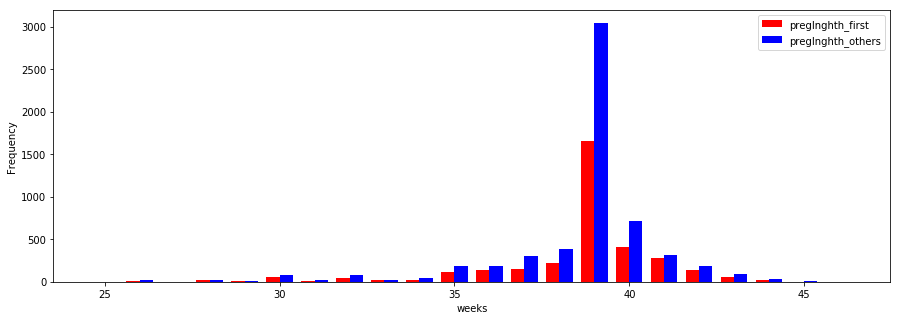

In [36]:
#bins=np.arange(bins[0],bins[1],1)
bins=[25,48]
plt.figure(figsize=(15,5))
plt.hist([firsts_val,others_val],bins=np.arange(bins[0],bins[1],1),align='left',label=['preglnghth_first','preglnghth_others'],
         rwidth=0.75,color=['r','b'])
#plt.hist(others_hist,bins=np.arange(bins[0],bins[1],1),alpha=0.5,align='left',color='r',label='preglnghth_others',rwidth=0.45)
plt.xlabel('weeks')
plt.ylabel('Frequency')
_=plt.legend(loc='best')

# 2.7: Summarizing distribution = Summary Statistics
- distribution visualization with few descriptive statistics
- Central Tendency 
- Modes
- Spread
- Tails
- Outliers

** Mean and Average **
- ** Mean => **$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$ (per Apple wt ==> Mean ==> Apple is less diverse)
- ** Average => ** Central tendency ==> (Pumpkin wt ==> more diverese)

** Variance **
- Variance =>$S^2 = \frac{1}{n}\sum_{i=1}^{n}(\bar{x} - x_i)^2$
- Std. deviation = S



In [37]:
print('{:.2f}'.format(live.prglngth.mean()))
print('{:.2f}'.format(live.prglngth.var()))
print('{:.2f}'.format(live.prglngth.std()))



38.56
7.30
2.70


In [42]:
## We read dictionary into dct, then dct calls read fixed
dct1=Common.ReadStataDct("2002FemResp.dct")

df1=dct1.ReadFixedWidth("2002FemResp.dat.gz",compression='gzip')

#df1=Common.CleanFemPreg(df)

In [43]:
df1.columns

Index(['caseid', 'rscrinf', 'rdormres', 'rostscrn', 'rscreenhisp',
       'rscreenrace', 'age_a', 'age_r', 'cmbirth', 'agescrn',
       ...
       'pubassis_i', 'basewgt', 'adj_mod_basewgt', 'finalwgt', 'secu_r',
       'sest', 'cmintvw', 'cmlstyr', 'screentime', 'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [52]:
resp_inc_val=df1.totincr.values

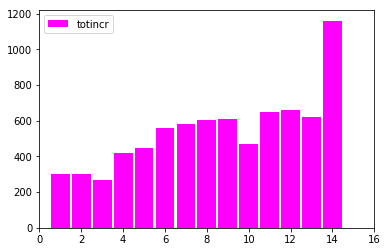

In [72]:
plt.hist(resp_inc_val,bins=np.arange(0,16,1),align='left',rwidth=0.9,label='totincr',color='magenta')
plt.xlim([0,16])
_=plt.legend(loc='best')


Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

In [78]:
resp_age_val=df1.age_r

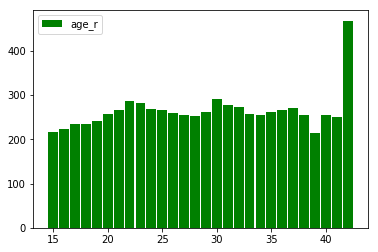

In [80]:
plt.hist(resp_age_val,bins=np.arange(resp_age_val.min(),resp_age_val.max(),1),align='left',rwidth=0.9,label='age_r',color='green')
_=plt.legend(loc='best')


Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

In [82]:
resp_numfmhh_val=df1.numfmhh

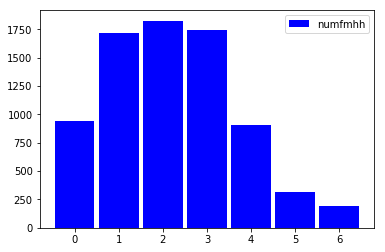

In [83]:
plt.hist(resp_numfmhh_val,bins=np.arange(resp_numfmhh_val.min(),resp_numfmhh_val.max(),1),align='left',rwidth=0.9,label='numfmhh',color='blue')
_=plt.legend(loc='best')

Make a histogram of parity, the number children the respondent has borne. How would you describe this distribution?

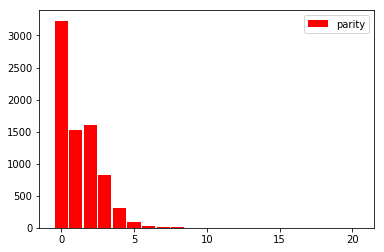

In [103]:
resp_parity_val=df1.parity

plt.hist(resp_parity_val,bins=np.arange(resp_parity_val.min(),resp_parity_val.max(),1),align='left',rwidth=0.9,label='parity',color='red')
_=plt.legend(loc='best')


In [106]:
a=Common.Hist(resp_parity_val.values)

In [199]:
a.hist[0]

3230

In [252]:
sorted(a.hist.items(),reverse=True)[:10]

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

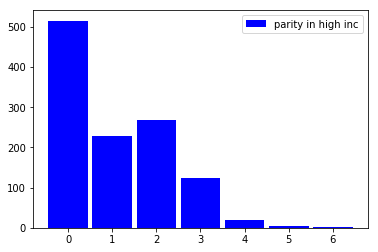

In [254]:
# high income is with recode value 14 from the above analysis
resp_parity_highinc_value=df1.parity[df1.totincr==14]

plt.hist(resp_parity_highinc_value,bins=np.arange(resp_parity_highinc_value.min(),resp_parity_highinc_value.max(),1),align='left',rwidth=0.9,label='parity in high inc',color='blue')
_=plt.legend(loc='best')